# GLOBAL LAND TEMPERATURE ANALYSIS

PURPOSE: This notebook is an in-depth analysis of historical land temperatures in countries all over the world, with a main focus on identifying long term climate change trends. By examining temperature patterns over decades, we tend to provide insights into the warming planet and its implications.

### IMPORTING THE LIBRARIES

In [350]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### READING THE FILE

In [351]:
df = pd.read_csv("/home/aayan/Portfolio_Python/Temp_Analysis_By_Major_City/GlobalLandTemperaturesByMajorCity.csv")
df.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1849-01-01,26.704,1.435,Abidjan,Côte D'Ivoire,5.63N,3.23W
1,1849-02-01,27.434,1.362,Abidjan,Côte D'Ivoire,5.63N,3.23W
2,1849-03-01,28.101,1.612,Abidjan,Côte D'Ivoire,5.63N,3.23W
3,1849-04-01,26.140,1.387,Abidjan,Côte D'Ivoire,5.63N,3.23W
4,1849-05-01,25.427,1.200,Abidjan,Côte D'Ivoire,5.63N,3.23W


In [352]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239177 entries, 0 to 239176
Data columns (total 7 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   dt                             239177 non-null  object 
 1   AverageTemperature             228175 non-null  float64
 2   AverageTemperatureUncertainty  228175 non-null  float64
 3   City                           239177 non-null  object 
 4   Country                        239177 non-null  object 
 5   Latitude                       239177 non-null  object 
 6   Longitude                      239177 non-null  object 
dtypes: float64(2), object(5)
memory usage: 12.8+ MB


In [353]:
df.describe()

,AverageTemperature,AverageTemperatureUncertainty
count,228175.000000,228175.000000
mean,18.125969,0.969343
std,10.024800,0.979644
min,-26.772000,0.040000
25%,12.710000,0.340000
50%,20.428000,0.592000
75%,25.918000,1.320000
max,38.283000,14.037000


In [354]:
df.shape

(239177, 7)

In [355]:
# df.count() # count non null values per column
# df.isnull().count() # count juts total rows per column...same as len(df)

# to count the number of missing values per column:
df.isnull().sum()

dt                                   0
AverageTemperature               11002
AverageTemperatureUncertainty    11002
City                                 0
Country                              0
Latitude                             0
Longitude                            0
dtype: int64

In [356]:
df.isnull().sum() / df.shape[0] * 100 # The loss of data per column, expressed as a percentage of the total rows.

# data.shape[0] gives the number of rows in the DataFrame. Dividing by this gives the proportion of missing values in each column.


dt                               0.000000
AverageTemperature               4.599941
AverageTemperatureUncertainty    4.599941
City                             0.000000
Country                          0.000000
Latitude                         0.000000
Longitude                        0.000000
dtype: float64

In [357]:
# dropping the missing values:
df.dropna(inplace = True)

In [358]:
df.isnull().sum()

dt                               0
AverageTemperature               0
AverageTemperatureUncertainty    0
City                             0
Country                          0
Latitude                         0
Longitude                        0
dtype: int64

In [359]:
df.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1849-01-01,26.704,1.435,Abidjan,Côte D'Ivoire,5.63N,3.23W
1,1849-02-01,27.434,1.362,Abidjan,Côte D'Ivoire,5.63N,3.23W
2,1849-03-01,28.101,1.612,Abidjan,Côte D'Ivoire,5.63N,3.23W
3,1849-04-01,26.140,1.387,Abidjan,Côte D'Ivoire,5.63N,3.23W
4,1849-05-01,25.427,1.200,Abidjan,Côte D'Ivoire,5.63N,3.23W


In [360]:
df[["City", "Country"]]

,City,Country
0,Abidjan,Côte D'Ivoire
1,Abidjan,Côte D'Ivoire
2,Abidjan,Côte D'Ivoire
3,Abidjan,Côte D'Ivoire
4,Abidjan,Côte D'Ivoire
...,...,...
239171,Xian,China
239172,Xian,China
239173,Xian,China
239174,Xian,China


In [361]:
df["Country"].value_counts() # to give the count of cities from each country

Country
China                                 34952
India                                 34627
Brazil                                12139
Turkey                                 9239
United States                          8237
Egypt                                  7550
Pakistan                               6490
Russia                                 6332
Canada                                 6282
Nigeria                                5200
Australia                              4138
Japan                                  4050
Colombia                               4003
Saudi Arabia                           3856
Indonesia                              3758
South Africa                           3746
Spain                                  3166
Italy                                  3166
Germany                                3166
United Kingdom                         3166
Ukraine                                3166
France                                 3166
Morocco                 

In [362]:
# to filter either India or China data in the dataframe via bitwise OR operator:
df[ (df["Country"] == "India") | (df["Country"] == "China") ]

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
3942,1796-01-01,19.649,2.286,Ahmadabad,India,23.31N,72.52E
3943,1796-02-01,21.632,1.770,Ahmadabad,India,23.31N,72.52E
3944,1796-03-01,24.953,2.427,Ahmadabad,India,23.31N,72.52E
3945,1796-04-01,30.297,1.827,Ahmadabad,India,23.31N,72.52E
3946,1796-05-01,33.223,1.496,Ahmadabad,India,23.31N,72.52E
...,...,...,...,...,...,...,...
239171,2013-04-01,12.563,1.823,Xian,China,34.56N,108.97E
239172,2013-05-01,18.979,0.807,Xian,China,34.56N,108.97E
239173,2013-06-01,23.522,0.647,Xian,China,34.56N,108.97E
239174,2013-07-01,25.251,1.042,Xian,China,34.56N,108.97E


In [363]:
# to filter only India and its average temp > 20 via AND operator:
df[(df["Country"] == "India") & (df["AverageTemperature"] > 20)]

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
3943,1796-02-01,21.632,1.770,Ahmadabad,India,23.31N,72.52E
3944,1796-03-01,24.953,2.427,Ahmadabad,India,23.31N,72.52E
3945,1796-04-01,30.297,1.827,Ahmadabad,India,23.31N,72.52E
3946,1796-05-01,33.223,1.496,Ahmadabad,India,23.31N,72.52E
3947,1796-06-01,32.129,2.920,Ahmadabad,India,23.31N,72.52E
...,...,...,...,...,...,...,...
216559,2013-04-01,30.546,0.279,Surat,India,21.70N,73.56E
216560,2013-05-01,32.980,1.097,Surat,India,21.70N,73.56E
216561,2013-06-01,29.418,0.527,Surat,India,21.70N,73.56E
216562,2013-07-01,27.306,0.257,Surat,India,21.70N,73.56E


In [364]:
# This line filters the DataFrame df to keep only the rows where the "Country" column is either "India", "China", or "United States":
df_selected = df[df["Country"].isin(["India", "China", "United States"])]
df_selected.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
3942,1796-01-01,19.649,2.286,Ahmadabad,India,23.31N,72.52E
3943,1796-02-01,21.632,1.770,Ahmadabad,India,23.31N,72.52E
3944,1796-03-01,24.953,2.427,Ahmadabad,India,23.31N,72.52E
3945,1796-04-01,30.297,1.827,Ahmadabad,India,23.31N,72.52E
3946,1796-05-01,33.223,1.496,Ahmadabad,India,23.31N,72.52E


In [367]:
# to convert the date from object to datetime format:
df_selected.loc[:, "dt"] = pd.to_datetime(df_selected["dt"])

In [368]:
df_selected.dtypes

dt                               datetime64[ns]
AverageTemperature                      float64
AverageTemperatureUncertainty           float64
City                                     object
Country                                  object
Latitude                                 object
Longitude                                object
dtype: object

In [369]:
# It groups the data by the "Country" column and then computes the mean (average) of all numerical columns within each group (i.e., per country):
df_selected.groupby("Country").mean(numeric_only=True)

,AverageTemperature,AverageTemperatureUncertainty
Country,,
China,11.793666,0.890271
India,25.809309,0.946047
United States,11.257246,1.200292


In [370]:
# to aggregate the numeric columns:
df_selected.select_dtypes(include = 'number').groupby(df_selected["Country"]).agg(["min", "max", "mean"])
# (include = 'number') -> This drops non-numeric columns before grouping and aggregating.


# or
# df_selected.groupby("Country")[["AverageTemperature", "AverageTemperatureUncertainty"]].agg(["min", "max", "mean"])


AverageTemperature                     \
                             min     max       mean   
Country                                               
China                    -26.772  31.233  11.793666   
India                     11.378  36.477  25.809309   
United States             -9.162  29.141  11.257246   

              AverageTemperatureUncertainty                    
                                        min     max      mean  
Country                                                        
China                                 0.056   6.870  0.890271  
India                                 0.056   7.781  0.946047  
United States                         0.075  10.193  1.200292

## Visualizations

In [371]:
# to store the average temps from each country in a variable:

india_avg_temps = df_selected[df_selected["Country"] == "India"]["AverageTemperature"]
china_avg_temps = df_selected[df_selected["Country"] == "China"]["AverageTemperature"]
us_avg_temps = df_selected[df_selected["Country"] == "United States"]["AverageTemperature"]


### KDE Histogram of Temperature Distribution

<Axes: xlabel='AverageTemperature', ylabel='Count'>

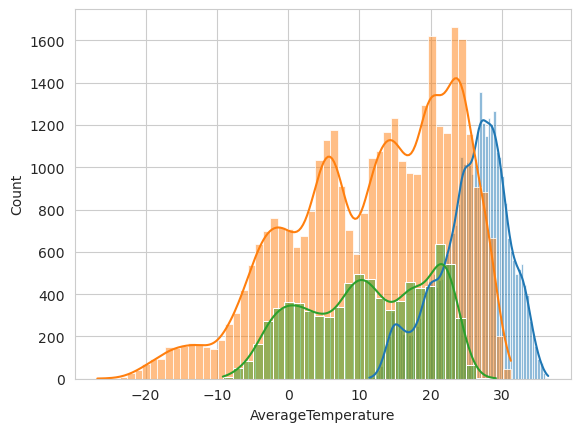

In [372]:
# now we plot a histogram with a Kernal Density Estimate curve (KDE Curve):

sns.histplot(india_avg_temps, kde = True)
sns.histplot(china_avg_temps, kde = True)
sns.histplot(us_avg_temps, kde = True)

INTERPRETATION: The distribution of average temperatures in the US, China, and India is contrasted in this histogram with KDE curves. The most prevalent temperature ranges are displayed by each peak. The average temperature in India is typically higher than in China and the US.

INSIGHTS: There’s a clear difference in baseline climate — useful for contextualizing later comparisons.

In [373]:
df_selected["Country"].value_counts().index

Index(['China', 'India', 'United States'], dtype='object', name='Country')

In [374]:
countries = df_selected["Country"].unique()

### Combined Histogram by Country

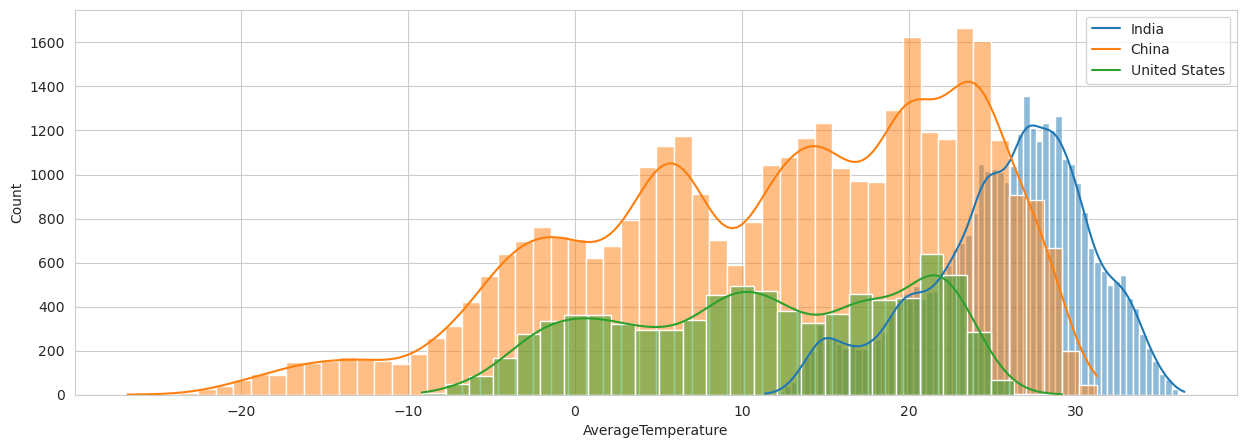

In [375]:
# for each country, we create one histogram plot showing the distribution of its temperature data:
   
sns.set_style("whitegrid")
plt.figure(figsize = (15,5))

for c in countries:
    sns.histplot(df_selected[df_selected["Country"] == c]["AverageTemperature"], kde = True)

plt.legend(countries)

INTERPRETATION: The temperature data for each nation is plotted to show the spread and distribution shape. India has a warmer climate than other regions, according to the histograms.

INSIGHTS: Confirms national-level climatic differences using the entire dataset.

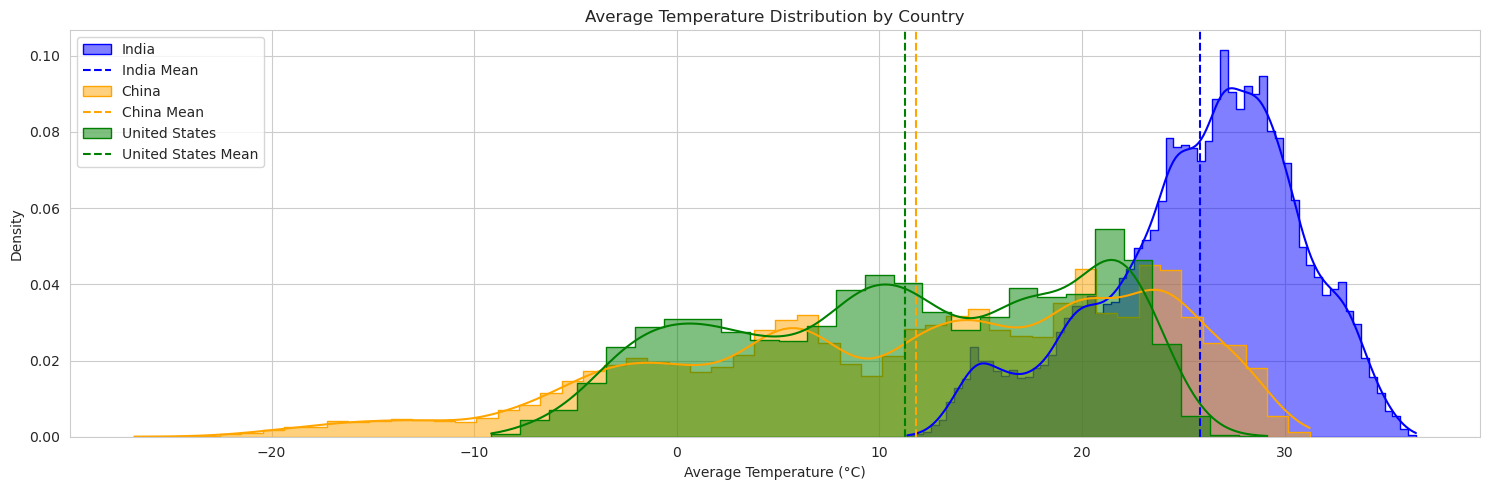

In [376]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("whitegrid")
plt.figure(figsize=(15, 5))

colors = {
    "India": "blue",
    "China": "orange",
    "United States": "green"
}

countries = df_selected["Country"].unique()

for c in countries:
    subset = df_selected[df_selected["Country"] == c]["AverageTemperature"].dropna()
    
    sns.histplot(subset, kde=True, label=c, color=colors[c], stat="density", element="step")
    
    mean_val = subset.mean()
    plt.axvline(mean_val, color=colors[c], linestyle="--", label=f"{c} Mean")

plt.title("Average Temperature Distribution by Country")
plt.xlabel("Average Temperature (°C)")
plt.ylabel("Density")
plt.legend()
plt.tight_layout()
plt.show()


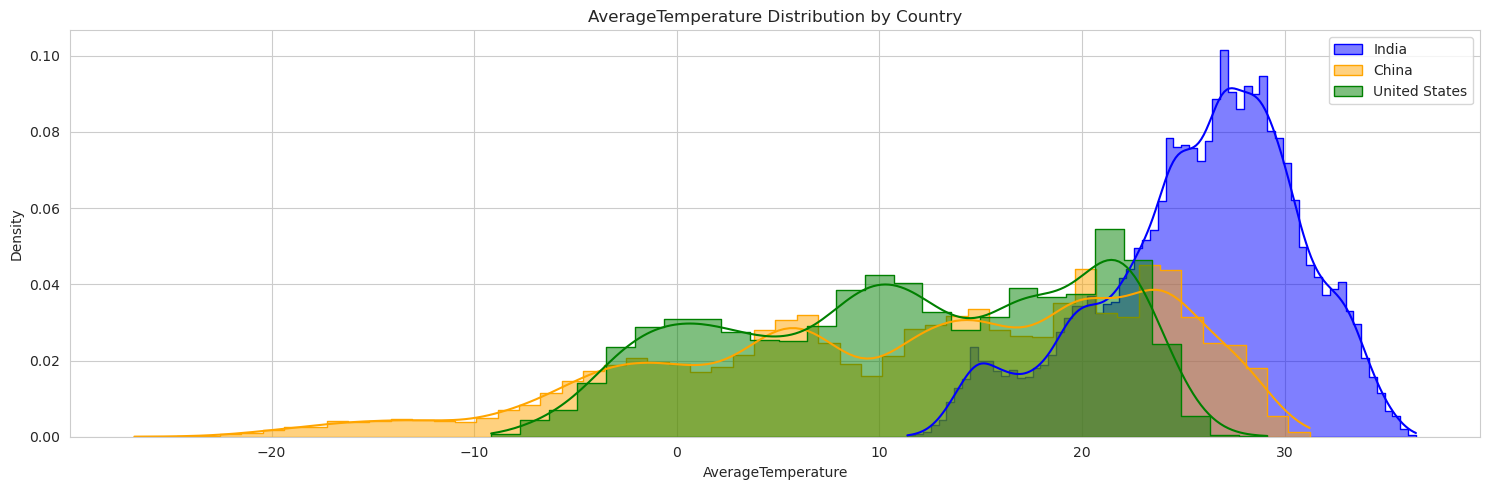

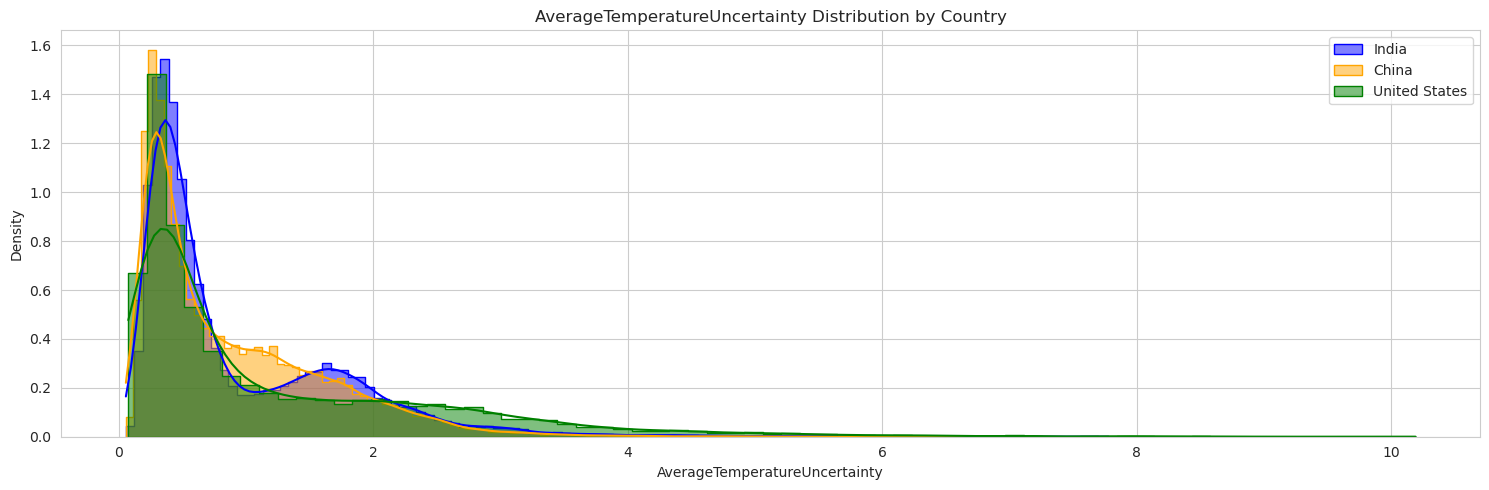

In [377]:
df_selected.columns[1:3] # Gets the 2nd and 3rd columns of df_selected

columns = df_selected.columns[1:3]
countries = df_selected["Country"].unique()
colors = {
    "India": "blue",
    "China": "orange",
    "United States": "green"
}
# plt.figure(figsize=(15,5))

for column in columns:
    plt.figure(figsize=(15,5))
    for c in countries:
        data = df_selected[df_selected["Country"] == c][column].dropna()
        sns.histplot(data, kde=True, label=c, color=colors[c], stat="density", element="step")

    plt.title(f"{column} Distribution by Country")
    plt.xlabel(column)
    plt.ylabel("Density")
    plt.grid(True)
    plt.tight_layout()
    plt.legend()
    plt.show()

## Scatterplots

In [378]:
df_selected.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
3942,1796-01-01,19.649,2.286,Ahmadabad,India,23.31N,72.52E
3943,1796-02-01,21.632,1.770,Ahmadabad,India,23.31N,72.52E
3944,1796-03-01,24.953,2.427,Ahmadabad,India,23.31N,72.52E
3945,1796-04-01,30.297,1.827,Ahmadabad,India,23.31N,72.52E
3946,1796-05-01,33.223,1.496,Ahmadabad,India,23.31N,72.52E


In [379]:
# Creating a dataframe for Indian region only from 1900 onwards:

ind_df = df_selected[(df_selected["Country"] == "India") & (df_selected["dt"] > "1900-01-01")]
ind_df.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
5191,1900-02-01,22.210,0.720,Ahmadabad,India,23.31N,72.52E
5192,1900-03-01,27.790,0.660,Ahmadabad,India,23.31N,72.52E
5193,1900-04-01,30.873,0.646,Ahmadabad,India,23.31N,72.52E
5194,1900-05-01,32.646,0.557,Ahmadabad,India,23.31N,72.52E
5195,1900-06-01,33.192,0.372,Ahmadabad,India,23.31N,72.52E


<Axes: xlabel='dt', ylabel='AverageTemperature'>

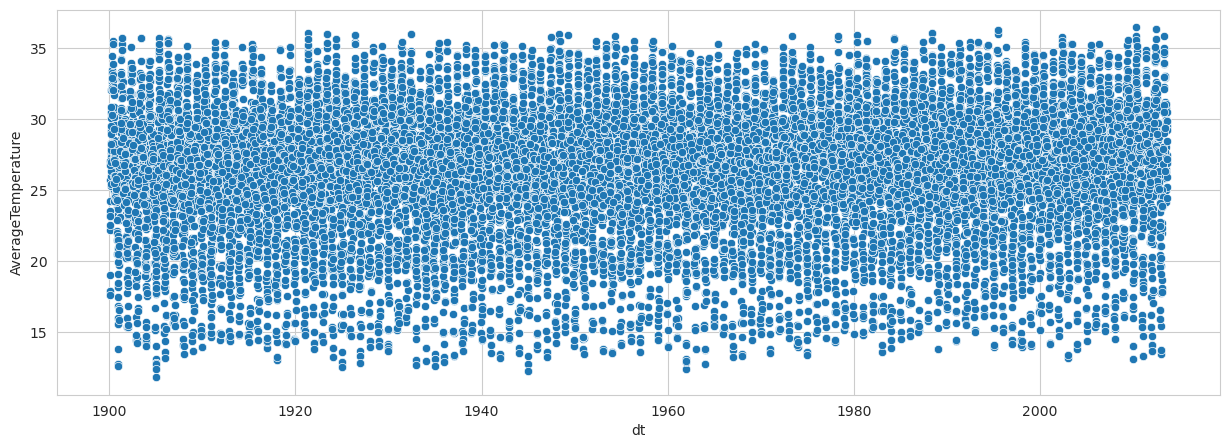

In [380]:
plt.figure(figsize=(15,5))
sns.scatterplot(x="dt", y="AverageTemperature", data=ind_df)

INTERPRETATION: The average temperature of India is displayed over time in this plot. Although there is year-to-year variability, the trend seems to be upward with noticeable scatter, suggesting a general warming pattern.

INSIGHTS: India is experiencing long-term warming, despite short-term fluctuations.

<Axes: xlabel='dt', ylabel='AverageTemperature'>

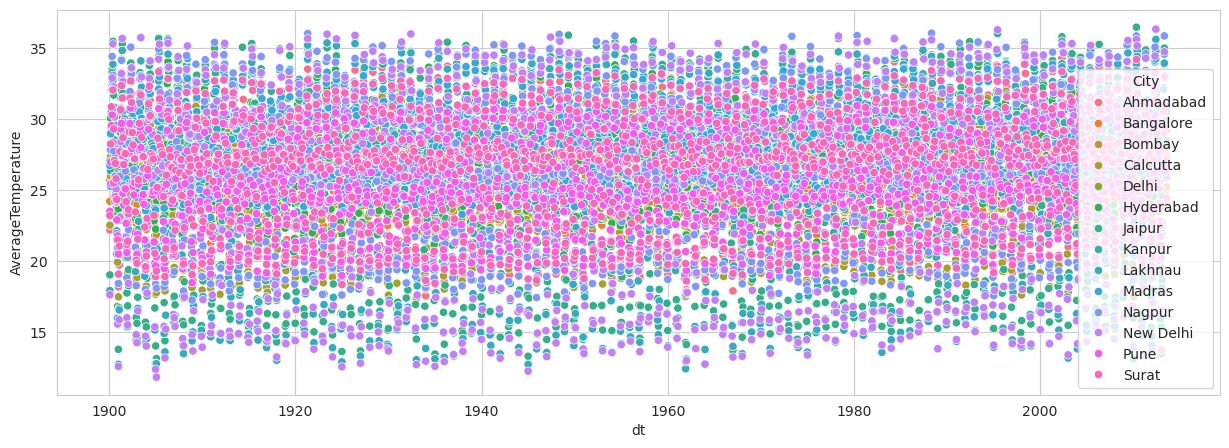

In [381]:
plt.figure(figsize=(15,5))
sns.scatterplot(x="dt", y="AverageTemperature", data=ind_df, hue="City")

INTERPRETATION: Similar to above, but with city-specific color coding, aids in determining which cities are regularly warmer or colder and observing regional differences in patterns.

INSIGHTS: Urban heat islands or altitude/climate differences show up clearly here.

<Axes: xlabel='dt', ylabel='AverageTemperature'>

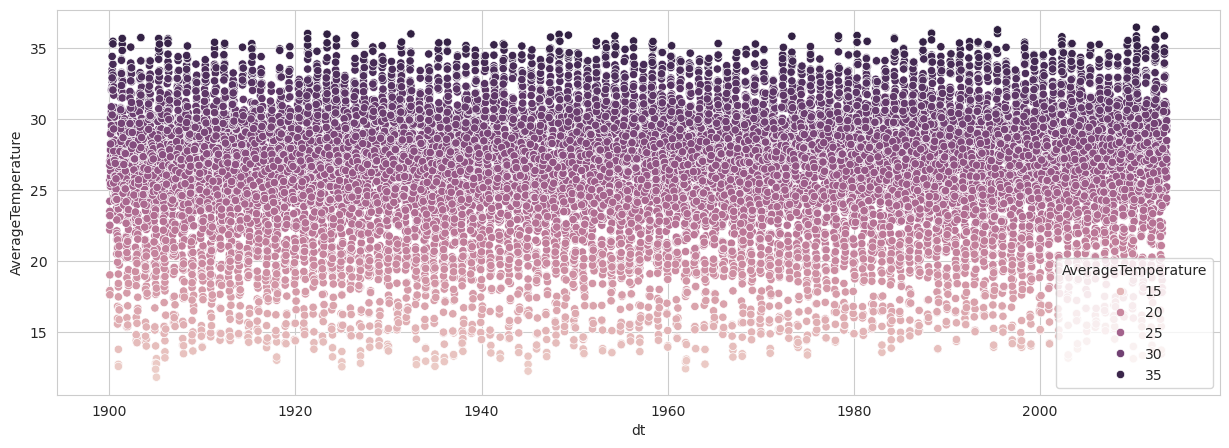

In [382]:
plt.figure(figsize=(15,5))
sns.scatterplot(x="dt", y="AverageTemperature", data=ind_df, hue="AverageTemperature")

INTERPRETATION: The hue creates the appearance of a heatmap by representing the temperature value. Cooler times may be indicated by darker hues.

INSIGHTS: An eye-catching method of observing warming patterns and anomalies.

In [383]:
ind_df.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
5191,1900-02-01,22.210,0.720,Ahmadabad,India,23.31N,72.52E
5192,1900-03-01,27.790,0.660,Ahmadabad,India,23.31N,72.52E
5193,1900-04-01,30.873,0.646,Ahmadabad,India,23.31N,72.52E
5194,1900-05-01,32.646,0.557,Ahmadabad,India,23.31N,72.52E
5195,1900-06-01,33.192,0.372,Ahmadabad,India,23.31N,72.52E


In [384]:
# computing the average of all numeric columns (like temperature) for each year in the ind_df DataFrame, where ind_df contains India’s temperature data from 1900 onward:

ind_df_mean = ind_df.groupby(ind_df["dt"].dt.to_period("Y")).mean(numeric_only= True) # for each year, it calculates the mean (average) of all numeric columns
ind_df_mean = ind_df_mean.reset_index()  # After grouping, the year is in the index (as a Period object). reset_index() moves the year back into a regular column called "dt"
ind_df_mean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114 entries, 0 to 113
Data columns (total 3 columns):
 #   Column                         Non-Null Count  Dtype        
---  ------                         --------------  -----        
 0   dt                             114 non-null    period[Y-DEC]
 1   AverageTemperature             114 non-null    float64      
 2   AverageTemperatureUncertainty  114 non-null    float64      
dtypes: float64(2), period[Y-DEC](1)
memory usage: 2.8 KB


In [385]:
# This line is converting the "dt" column in the ind_df_mean DataFrame first to string from period, and then to datetime format.
ind_df_mean["dt"] = ind_df_mean["dt"].astype("string").astype("datetime64[ns]")

In [386]:
ind_df_mean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114 entries, 0 to 113
Data columns (total 3 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   dt                             114 non-null    datetime64[ns]
 1   AverageTemperature             114 non-null    float64       
 2   AverageTemperatureUncertainty  114 non-null    float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 2.8 KB


### Line PLot of India's Mean Temperature Over Time

<Axes: xlabel='dt', ylabel='AverageTemperature'>

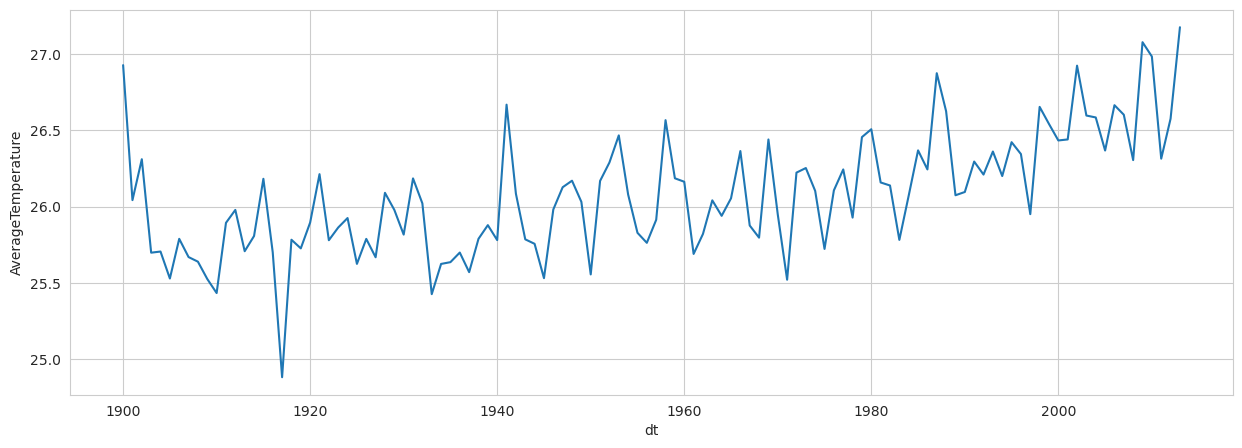

In [387]:
plt.figure(figsize=(15,5))
sns.lineplot(x="dt", y="AverageTemperature", data = ind_df_mean)

INTERPRETATION: A smoother view of how India’s temperature is trending over time after 1900. It removes noise from city-level variability.

INSIGHTS: It clearly and comprehensively supports India's warming trend.

In [388]:
# Taking all the data for India, China and US from the 1900 onwards:
df_1900 = df_selected[df_selected["dt"]> "01.01.1900"]
df_1900.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
5191,1900-02-01,22.210,0.720,Ahmadabad,India,23.31N,72.52E
5192,1900-03-01,27.790,0.660,Ahmadabad,India,23.31N,72.52E
5193,1900-04-01,30.873,0.646,Ahmadabad,India,23.31N,72.52E
5194,1900-05-01,32.646,0.557,Ahmadabad,India,23.31N,72.52E
5195,1900-06-01,33.192,0.372,Ahmadabad,India,23.31N,72.52E


In [389]:
df_means = df_1900.groupby(["Country",df_1900["dt"].dt.to_period("Y")]).mean(numeric_only = True)  # calculates the mean of all numeric columns for each country-year pair
df_means = df_means.reset_index() # resetting the index of the grouped result to turn "Country" and "dt" back into regular columns instead of a multi-index.
df_means["dt"]= df_means["dt"].astype("string").astype("datetime64[ns]") # converts into a datetime object (1901-01-01) so it can be plotted on a time axis or filtered using datetime methods.


df_means.info()
df_means

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 342 entries, 0 to 341
Data columns (total 4 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   Country                        342 non-null    object        
 1   dt                             342 non-null    datetime64[ns]
 2   AverageTemperature             342 non-null    float64       
 3   AverageTemperatureUncertainty  342 non-null    float64       
dtypes: datetime64[ns](1), float64(2), object(1)
memory usage: 10.8+ KB


,Country,dt,AverageTemperature,AverageTemperatureUncertainty
0,China,1900-01-01,13.424017,1.334972
1,China,1901-01-01,11.731026,1.269880
2,China,1902-01-01,12.338167,1.221411
3,China,1903-01-01,11.891948,1.054870
4,China,1904-01-01,11.724964,0.985563
...,...,...,...,...
337,United States,2009-01-01,12.372389,0.325028
338,United States,2010-01-01,13.020167,0.337444
339,United States,2011-01-01,12.787111,0.355472
340,United States,2012-01-01,13.960778,0.393278


INTERPRETATION: The code prepares for multi-line plots comparing how each country’s (INDIA, CHINA, USA) average temperature has changed annually since 1900.

INSIGHTS:
Sets up long-term, country-wise comparisons.

### Trend line Plots by Country

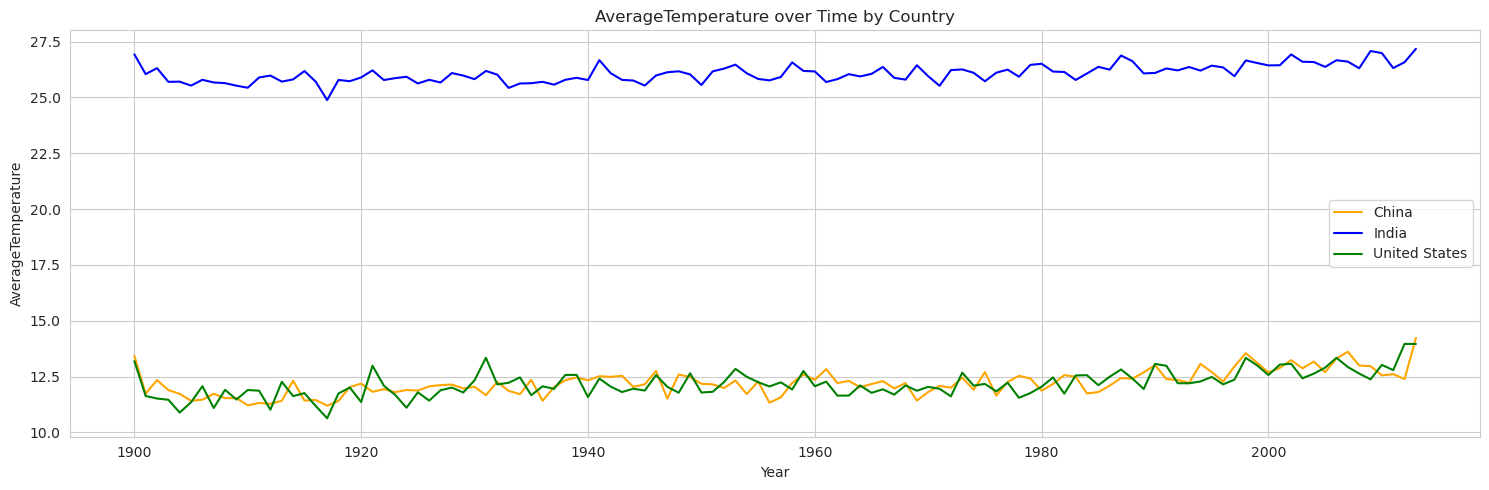

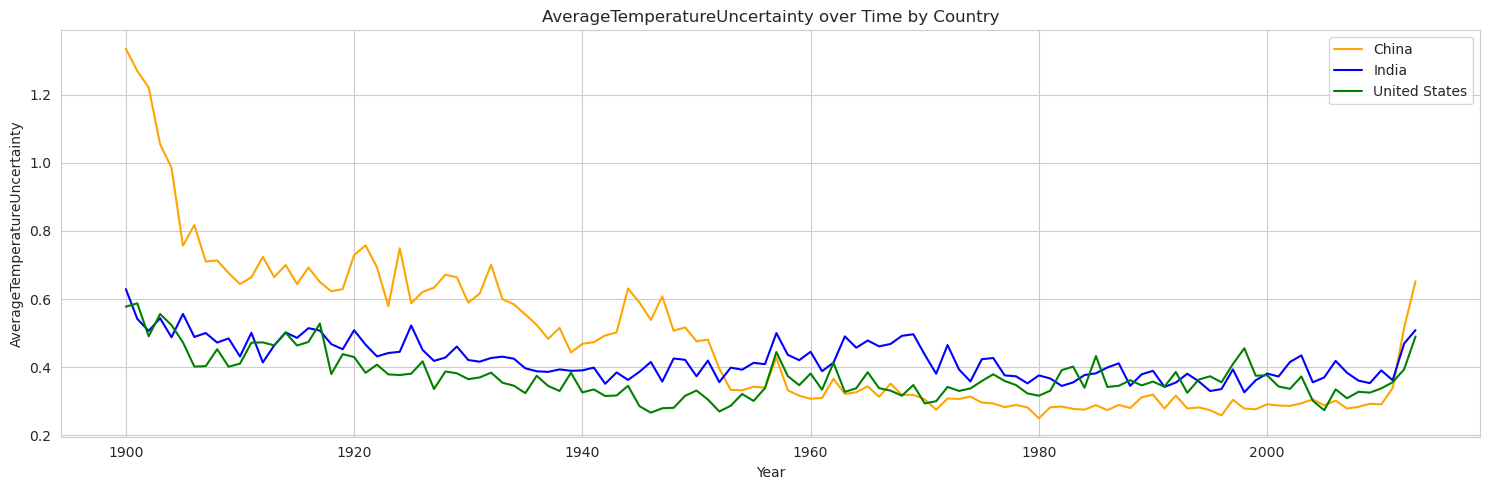

In [390]:
# plotting the trend lines:



for col in df_means.columns[2:4]: # Loops over the 3rd ("AverageTemperature") and 4th ("AverageTemperatureUncertainty") columns of our df_means dataframe
    plt.figure(figsize=(15,5))
    colors = {
    "India": "blue",
    "China": "orange",
    "United States": "green"}

    for c in df_means["Country"].unique(): # Loops through each unique country 
        data = df_means[df_means["Country"] == c] # Filters the dataset to get data only for that country.
        sns.lineplot(x = "dt", y = col, data = data, label = c, color = colors[c]) # creating a line plot using seaborn

    plt.title(f"{col} over Time by Country")
    plt.xlabel("Year")
    plt.ylabel(col)
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()
    

INTERPRETATION: These two plots shows the temperature and level of uncertainty by nation over time. The average annual temperature for each nation is represented by a line, indicating trends in national warming.

Insight:
All countries show warming, but at different rates. It is very useful for regional policy analysis.